# Using Keras and TensorFlow on the MNIST Dataset

Modified from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

The Keras library is a high level API that can be used to write cleaner Deep Learning code, and connects to many frameworks.  Here, we work with the TensorFlow framework.  
MNIST is a dataset of handwritten numbers, and is used so frequently that a library exists to access the data directly.

In [104]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Loading the MNIST Dataset

The data consists of 60,000 images, of 28 x 28 pixels each.  

In [105]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Building the Neural Network

TODO:  Describe the topology of the network here

In [106]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Training the Model

The default number of epochs is 12.  For non-GPU systems, each epoch can take longer than a minute.

In [126]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0254 - acc: 0.9919 - val_loss: 0.0270 - val_acc: 0.9919
Epoch 2/12
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0234 - acc: 0.9928 - val_loss: 0.0263 - val_acc: 0.9912
Epoch 3/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0222 - acc: 0.9928 - val_loss: 0.0277 - val_acc: 0.9917
Epoch 4/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0213 - acc: 0.9933 - val_loss: 0.0317 - val_acc: 0.9911
Epoch 5/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0214 - acc: 0.9930 - val_loss: 0.0286 - val_acc: 0.9916
Epoch 6/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0194 - acc: 0.9940 - val_loss: 0.0281 - val_acc: 0.9915
Epoch 7/12
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0196 - acc: 0.9937 - val_loss: 0.0365 - val_acc

## Seeing the Prediction in Action

The Keras API is somewhat high level, and it is nice to be able to see where the moving parts are in the code.  To do that, we randomly select an image, predict its label, and compare our prediction to the ground truth.

Image #:9374
Class:  7


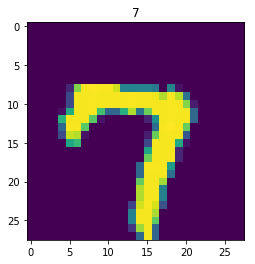

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

imageNum = random.randint(1,len(x_test)) - 1 

img = x_test[imageNum]
test_img = img.reshape((1,784))
#img_class = model.predict_classes(x_test)
prediction = img_class[imageNum]
classname = img_class[imageNum]
print("Image #:" + str(imageNum))
print("Class: ",classname)

img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()
#[]

## Saving the Model

The model metadata is saved as a `.json` file, while the model weights are saved in a separate HDF5 file, which is a compressed format.  

In [131]:
filename = "model-" + str(epochs) + "epochs" 
model_json = model.to_json()
with open(filename + ".json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(filename + ".h5")
print("Saved model to disk")

Saved model to disk


We can take a peek at the weights for comparison.

In [132]:
weights = model.get_weights()
weights[0][0][0,:]

array([[ 0.10927654,  0.10947698, -0.03881344, -0.04827883,  0.23518483,
         0.21955341,  0.2321063 ,  0.19014159,  0.11312762,  0.14508425,
         0.32809755, -0.03462591, -0.29194313,  0.10265226, -0.25803047,
        -0.02435865,  0.24643123, -0.016085  ,  0.10376387, -0.02634757,
         0.12163555, -0.24826382,  0.03347541, -0.09186963, -0.2543182 ,
         0.04574647,  0.24469429, -0.27173215,  0.2361595 ,  0.23593156,
        -0.13275822,  0.01125437]], dtype=float32)

## Loading the Saved Model

We can also reload this model and verify that it is performing exactly as the model that was saved.

In [133]:
# load json and create model
json_file = open( filename + '.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights( filename + ".h5")
print("Loaded model from disk")

Loaded model from disk


The weights should be exactly the same, with no roundoff error.

In [134]:
loaded_weights = loaded_model.get_weights()
loaded_weights[0][0][0,:]

array([[ 0.10927654,  0.10947698, -0.03881344, -0.04827883,  0.23518483,
         0.21955341,  0.2321063 ,  0.19014159,  0.11312762,  0.14508425,
         0.32809755, -0.03462591, -0.29194313,  0.10265226, -0.25803047,
        -0.02435865,  0.24643123, -0.016085  ,  0.10376387, -0.02634757,
         0.12163555, -0.24826382,  0.03347541, -0.09186963, -0.2543182 ,
         0.04574647,  0.24469429, -0.27173215,  0.2361595 ,  0.23593156,
        -0.13275822,  0.01125437]], dtype=float32)

We can evaluate the performance of the trained model and the reloaded model to verify that we have the same model in both cases.

In [135]:
# evaluate loaded model on test data
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print ("Original Model Pero")
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Test loss: 0.027031348173831383
Test accuracy: 0.9928
acc: 99.28%
Test loss: 0.027031348173831383
Test accuracy: 0.9928
acc: 99.28%
